# Plots data from the Global Carbon Budget project

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

First load the data. These data are in `.csv` format. All values in PgC/yr (P = petagram) for the globe, where 1 Pg = 10$^15$g. How many tonnes is that?

So these numebrs represent the rate of increase over time:

In [14]:
data = pd.read_csv('Global_Carbon_Budget_2023v1.1.csv', skiprows = 21, encoding='utf-8')
data

,Year,fossil emissions excluding carbonation,land-use change emissions,atmospheric growth,ocean sink,land sink,cement carbonation sink,budget imbalance,Unnamed: 8,Unnamed: 9,...,Unnamed: 1014,Unnamed: 1015,Unnamed: 1016,Unnamed: 1017,Unnamed: 1018,Unnamed: 1019,Unnamed: 1020,Unnamed: 1021,Unnamed: 1022,Unnamed: 1023
0,1959.0,2.416665,2.121527,2.03904,0.992420,0.430359,0.012542,1.063831,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1960.0,2.561796,1.864403,1.50804,0.936514,1.252347,0.013682,0.715617,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1961.0,2.569428,1.787483,1.65672,0.839509,0.899620,0.014548,0.946515,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1962.0,2.660086,1.657757,1.18944,0.923603,1.293962,0.015680,0.895158,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1963.0,2.801869,1.604057,1.21068,1.111698,0.959732,0.016653,1.107163,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
year = data['Year']
FF = data['fossil emissions excluding carbonation']
LU = data['land-use change emissions']
atm = data['atmospheric growth']
ocean = data['ocean sink']
land = data['land sink']
carbonation = data['cement carbonation sink']
imbalance = data['budget imbalance']

## Plot

Let's do a plot with two panels, one with total emissions (fossil fuels + land-use changes) with atmospheric growth, and the other with ocean and land sinks (everything as a function of time):

In [21]:
emissions = FF+LU

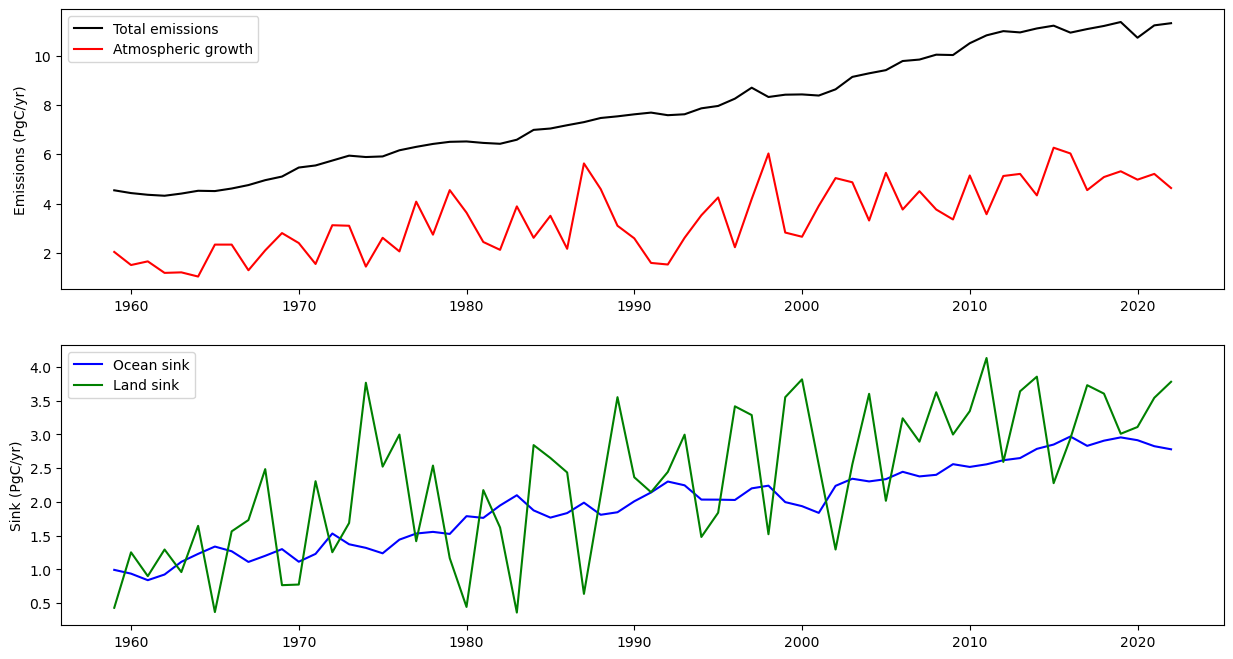

In [20]:
fig, axs = plt.subplots(2, 1, figsize = (15, 8))

# First panel
axs[0].plot(year, emissions, color = 'k', label = 'Total emissions')
axs[0].plot(year, atm, color = 'r', label = 'Atmospheric growth')
axs[0].legend();
axs[0].set_ylabel('Emissions (PgC/yr)');

# Second panel
axs[1].plot(year, ocean, color = 'b', label = 'Ocean sink')
axs[1].plot(year, land, color = 'g', label = 'Land sink')
axs[1].legend();
axs[1].set_ylabel('Sink (PgC/yr)');

## Plot the emissions - sinks vs atmospheric growth

Instead of plotting the above variables as a function of time, plot a figure with one panel only, with the total emissions minus the sinks vs atmospheric growth. In other words, do `plt.plot(X,Y)` where you have calculated `X` to be the sinks and `Y` to be atmospheric growth.

In [ ]:
# Write your code here

## Calculate the fraction of emissions absorved by the ocean and land

Calculate the percentage of the total emissions absorbed by the ocean and land respectively. Check the instructions document if you're stuck, and fill the code below with your calculations:

In [ ]:
ocean_frac = 
land_frac = 
carbN_frac = 

In [ ]:
# Write your code to plot here

Calculate the average ocean and land sinks:

In [ ]:
ave_oce_frac = 
ave_land_frac = 

# Cumulative increase in emissions

Remember the graphs above show the growth rate of emissions and sinks, that is how much it changed each year, not the total amount in each reservoir. 

Here we'll calculate the cumulative increase in emissions, atmospheric growth and the sinks, relative to 1959 using `numpy`'s cuumlative sum:

In [22]:
cumu_emissions = np.cumsum(emissions)
cumu_atm_growth = np.cumsum(atm)
cumu_oce_sink = np.cumsum(ocean)
cumu_land_sink = np.cumsum(land)
cumu_carbN_sink = np.cumsum(carbonation)

Plot the cumulative values:

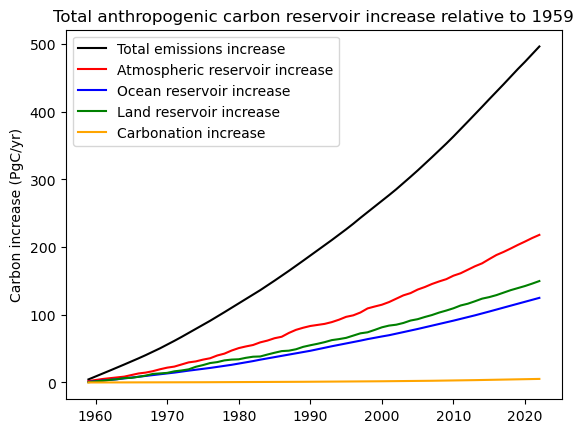

In [24]:
plt.plot(year, cumu_emissions, color = 'k', label = 'Total emissions increase')
plt.plot(year, cumu_atm_growth, color = 'r', label = 'Atmospheric reservoir increase')
plt.plot(year, cumu_oce_sink, color = 'b', label = 'Ocean reservoir increase')
plt.plot(year, cumu_land_sink, color = 'g', label = 'Land reservoir increase')
plt.plot(year, cumu_carbN_sink, color = 'orange', label = 'Carbonation increase')
plt.legend();
plt.ylabel('Carbon increase (PgC/yr)');
plt.title('Total anthropogenic carbon reservoir increase relative to 1959')
plt.savefig('CumulativeEmissions.jpg', bbox_inches = 'tight');

Calculate the total amount of carbon taken up by the oceans for the whole record 

In [27]:
total_ocean_sink = np.sum(ocean)
total_ocean_sink

124.99068995